In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/hicrep/report.tsv"

tool_pretty_names = {
    "cooler_cooler": "hicrep (cooler)",
    "hictk_hic": "hicrep (hictk hic)",
    "hictk_cooler": "hicrep (hictk cool)",
}

color_palette = ["cornflowerblue", "forestgreen", "orange"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_mb"] = df["memory"] / 1.0e3  # kb -> mb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)

    return df.sort_values(["resolution", "tool"])

In [4]:
df = import_data(bench_results)
df

,tool,format,resolution,time,memory,time_min,memory_mb
0,hicrep (cooler),cooler,25000,178.18,2257396,2.969667,2257.396
3,hicrep (cooler),cooler,25000,178.19,1927196,2.969833,1927.196
6,hicrep (cooler),cooler,25000,177.70,2002848,2.961667,2002.848
1,hicrep (hictk cool),cooler,25000,162.06,1578840,2.701000,1578.840
4,hicrep (hictk cool),cooler,25000,160.88,1581368,2.681333,1581.368
7,hicrep (hictk cool),cooler,25000,161.23,1578964,2.687167,1578.964
2,hicrep (hictk hic),hic,25000,1039.83,2736640,17.330500,2736.640
5,hicrep (hictk hic),hic,25000,1028.62,2738960,17.143667,2738.960
8,hicrep (hictk hic),hic,25000,1033.01,2751876,17.216833,2751.876


/tmp/ipykernel_2131292/986005529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, y="tool", x="time_min", estimator="median", ax=ax, errorbar="se", palette=color_palette)


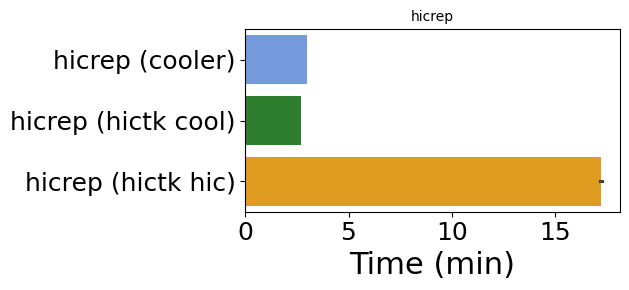

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 3))
sns.barplot(df, y="tool", x="time_min", estimator="median", ax=ax, errorbar="se", palette=color_palette)
ax.set(title="hicrep", xlabel="Time (min)", ylabel="")

fig.tight_layout()
fig.savefig("/tmp/hicrep_runtime.png", dpi=600)
fig.savefig("/tmp/hicrep_runtime.svg")

/tmp/ipykernel_2131292/3294343558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, y="tool", x="memory_mb", estimator="median", ax=ax, errorbar="se", palette=color_palette)


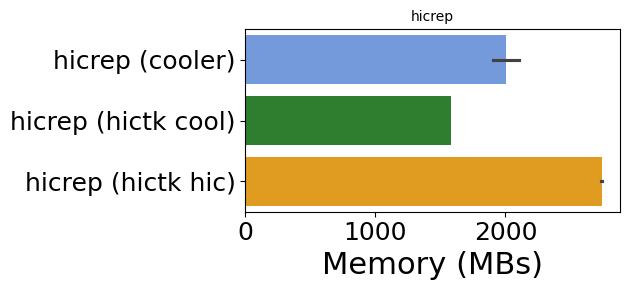

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 3))
sns.barplot(df, y="tool", x="memory_mb", estimator="median", ax=ax, errorbar="se", palette=color_palette)
ax.set(title="hicrep", xlabel="Memory (MBs)", ylabel="")

fig.tight_layout()
fig.savefig("/tmp/hicrep_memory.png", dpi=600)
fig.savefig("/tmp/hicrep_memory.svg")